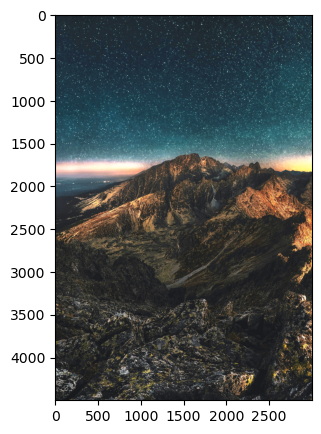

In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def boundedPixelValue(color, brightnessFactor):
	scaledValue = float(color * (1 + brightnessFactor))
	if scaledValue < 0:
		return 0
	elif scaledValue > 255:
		return 255

	return int(scaledValue)

im = Image.open("..//img/noche_estrellas.jpg")   
out = Image.new('RGB', im.size, 0xffffff)

# brightnessFactor = float(input("Enter brightness amount (-1.0 to 1.0: "))
brightnessFactor = 1

width, height = im.size

for x in range(width):
    for y in range(height):
        r,g,b = im.getpixel((x,y))

        updatedR = boundedPixelValue(r, brightnessFactor)
        updatedG = boundedPixelValue(g, brightnessFactor)
        updatedB = boundedPixelValue(b, brightnessFactor)

        out.putpixel((x,y), (updatedR, updatedG, updatedB))




plt.figure(figsize = (10, 5))
plt.imshow(out)

plt.show()
# out.save('brightnessScaled.jpg')

(-0.5, 2999.5, 4499.5, -0.5)

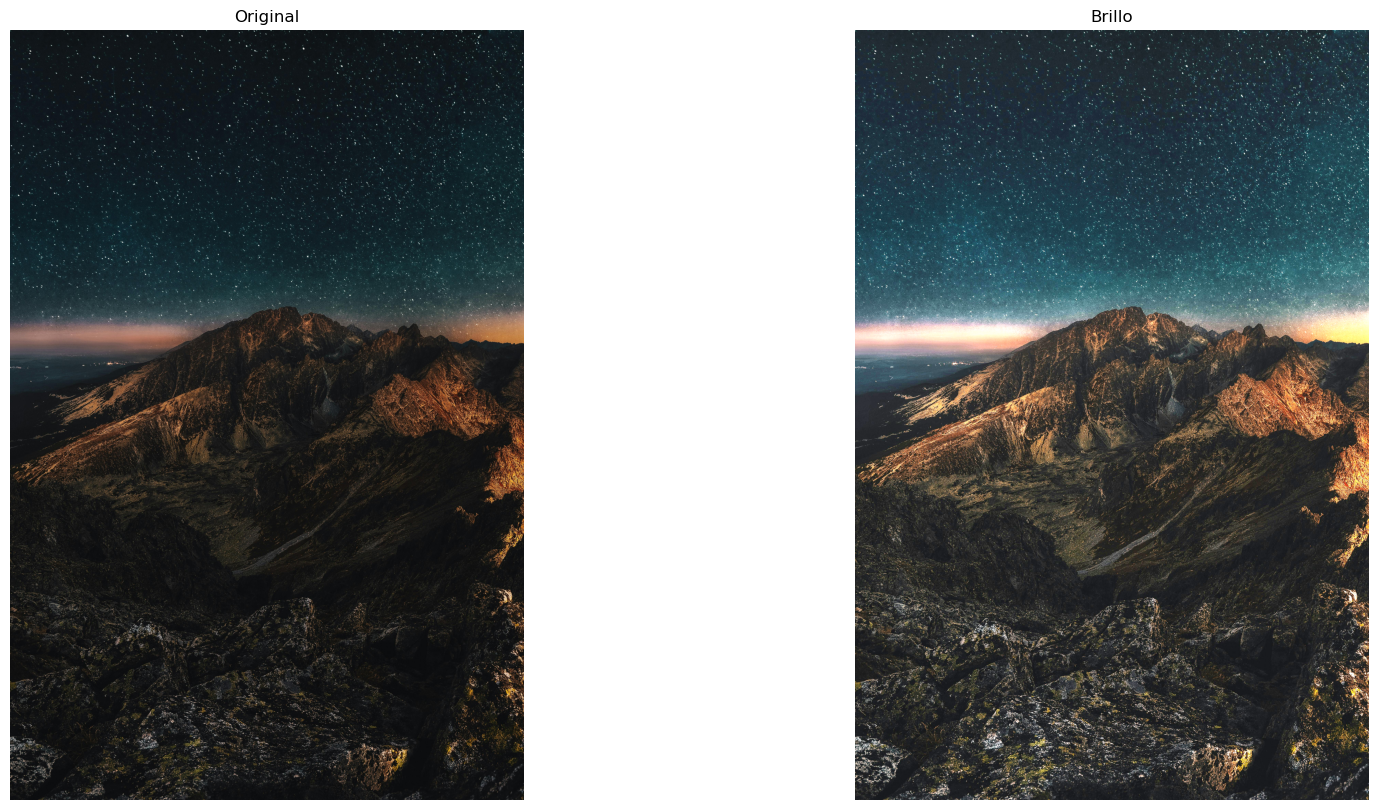

In [4]:
plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(im)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Brillo')
plt.imshow(out)
plt.axis('off')

(-0.5, 2999.5, 4499.5, -0.5)

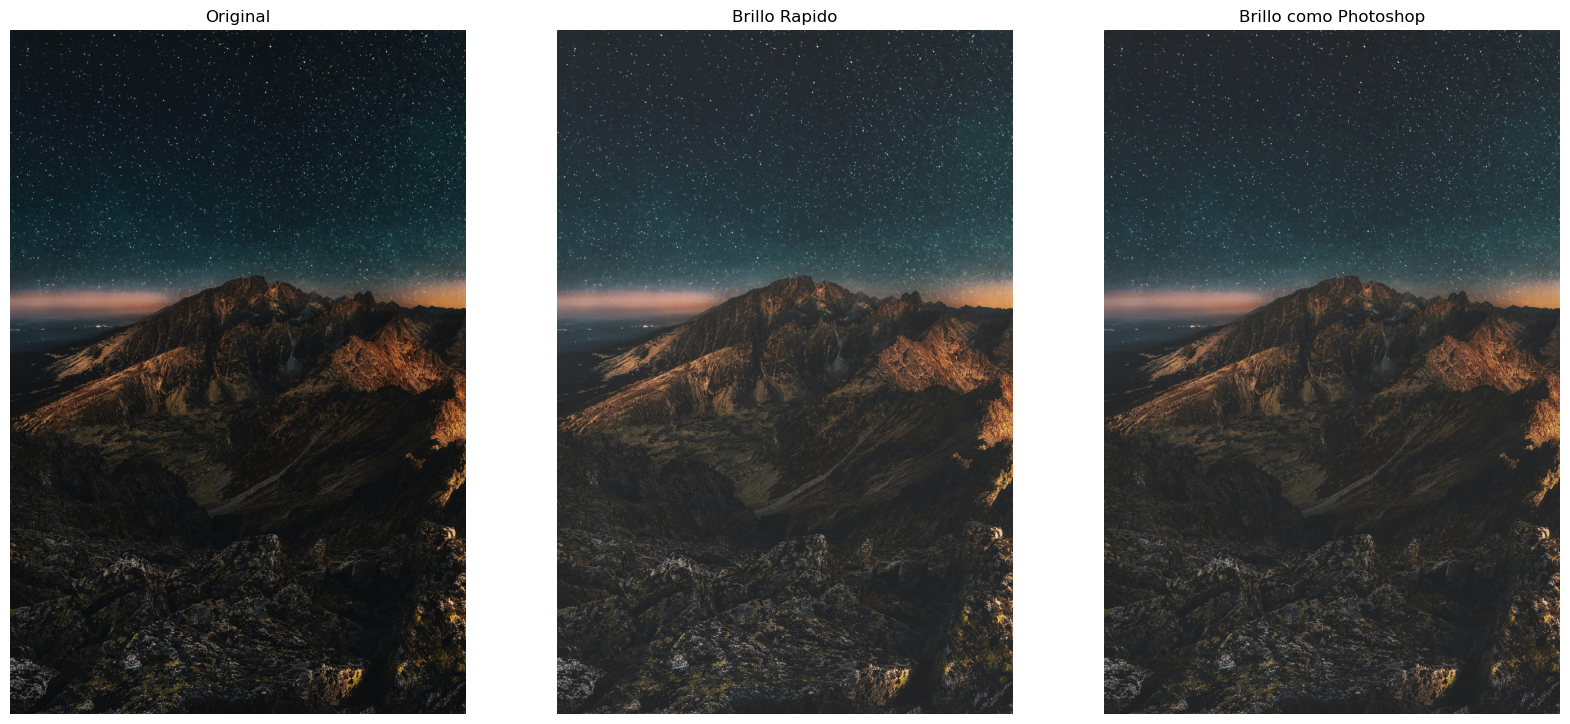

In [12]:
import cv2

def fast_brightness(input_image, brightness):
    img = input_image.copy()
    cv2.convertScaleAbs(img, img, 1, brightness)
    return img

def photoshop_brightness(input_img, brightness = 0):
    
    img = input_img.copy()
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        cv2.convertScaleAbs(input_img, img, alpha_b, gamma_b)

    return img

img = cv2.imread('..//img/noche_estrellas.jpg')

imgb = fast_brightness(img, 21)

imgp = photoshop_brightness(img, 21)

plt.figure(figsize = (20, 10))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Brillo Rapido')
plt.imshow(cv2.cvtColor(imgb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Brillo como Photoshop')
plt.imshow(cv2.cvtColor(imgp, cv2.COLOR_BGR2RGB))
plt.axis('off')

# cv2.imwrite('output.jpg', fast_brightness(img, 100))

-1

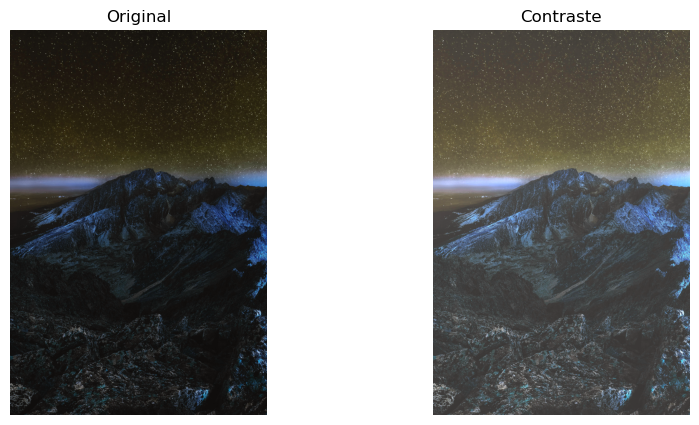

In [6]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse
import matplotlib.pyplot as plt
 
# Read image given by user

 
image = cv.imread('..//img/noche_estrellas.jpg')

 
 
 
new_image = np.zeros(image.shape, image.dtype)
 
 
 
alpha = 1.0 # Simple contrast control
beta = 0 # Simple brightness control
 
# Initialize values

try:
#  alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
 alpha = 1.3
#  beta = int(input('* Enter the beta value [0-100]: '))
 beta = 40
except ValueError:
 print('Error, not a number')
 
 
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
 
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
 
 
 
# cv.imshow('Original Image', image)
# cv.imshow('New Image', new_image)


plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image) 
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Contraste')
plt.imshow(new_image)
plt.axis('off')
 
# Wait until user press some key
cv.waitKey()

In [8]:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
gamma = 0.4
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv.LUT(new_image , lookUpTable)

(-0.5, 2999.5, 4499.5, -0.5)

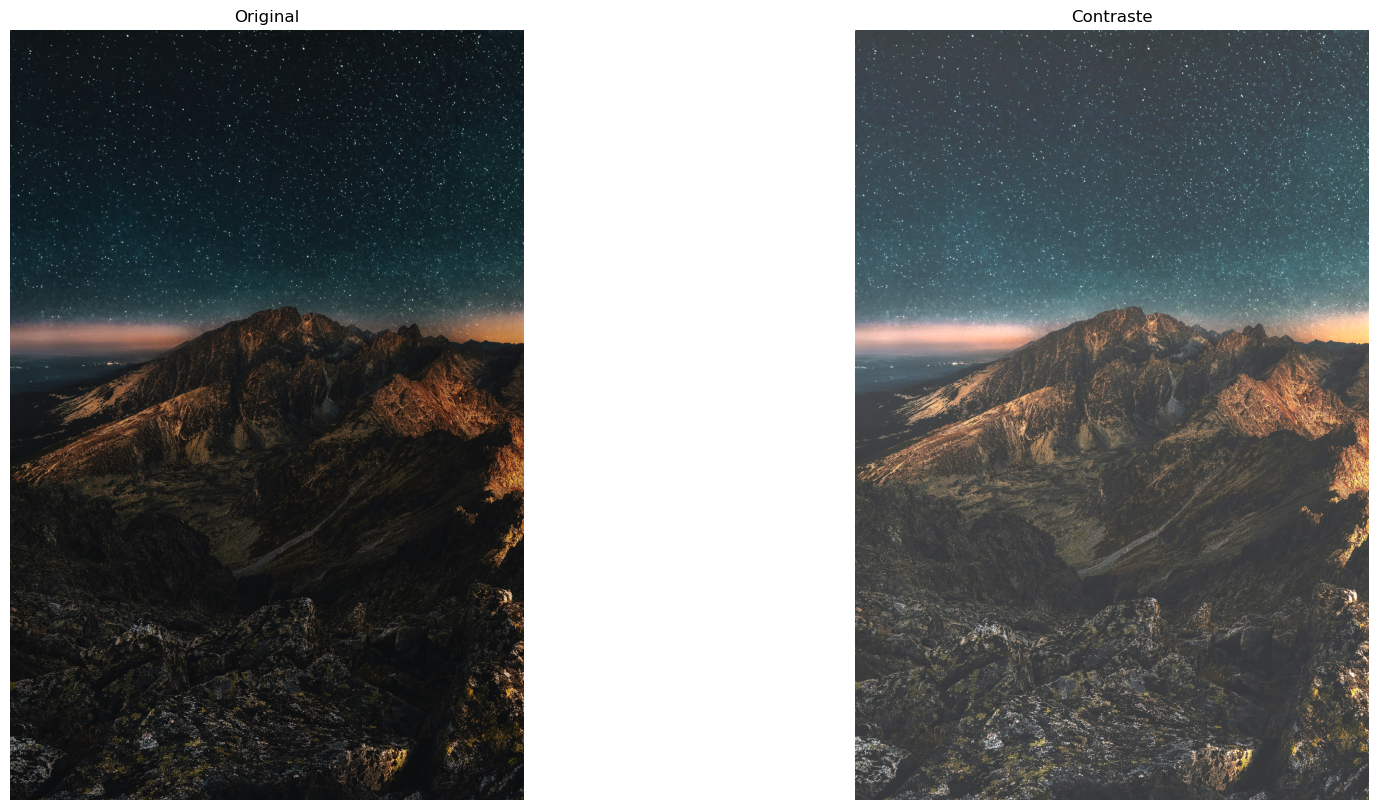

In [9]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)) 
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Contraste')
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))
plt.axis('off')